In [45]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [46]:
#Cargamos el conjunto dde datos
df = pd.read_csv('flats.csv')
df.head()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [47]:
#Dividimos el conjunto de datos originales en conjuntos de entrenamiento (80%) y de prueba (20%):
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,[0,2,3,4,5,6,7,8,9,10]], df.iloc[:,1], test_size=0.2)

In [48]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [49]:
lr.score(X_test, Y_test)

0.6165301543543973

In [50]:
scores = cross_val_score(lr,df.iloc[:,[0,2,3,4,5,6,7,8,9,10]], df.iloc[:,1], cv=7, scoring='neg_mean_squared_error')

In [51]:
scores.mean()

-884.6276209564692

In [52]:
scores.std()

266.6246235334142

In [53]:
scores = cross_val_score(lr,df.iloc[:,[0,2,3,4,5,6,7,8,9,10]], df.iloc[:,1], cv=10, scoring='r2')

In [54]:
scores.mean()

0.6742784500456379

In [55]:
scores.std()

0.07401165618383608

In [56]:
print('y = ' + str(lr.intercept_) + ' ')

y = -25.528850690612913 


In [57]:
for i, c in enumerate(lr.coef_):
          print(str(c) + ' * x' + str(i))

0.001493065182818942 * x0
1.652907468981763 * x1
1.4298387653718785 * x2
1.142276118903434 * x3
-3.2834317948900344 * x4
-1.3675451793965099 * x5
9.381256272013689 * x6
4.1098356626385355 * x7
7.5459392426586485 * x8
-2.945313179621697 * x9


Text(0.5, 0, 'price')

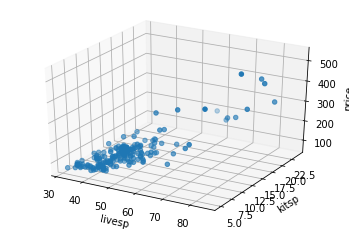

In [58]:
df= df.iloc[:,[3,4,1]].sample(n=200,random_state=234)
df['constante'] = 1

# create arrays for the data points
X = df.iloc[:,[0,1,3]]
Y = df.iloc[:,2]

# use numpy arrays so that we can use linear algebra later
X = np.array(X)
Y = np.array(Y)

# graph the data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('livesp')
ax.set_ylabel('kitsp')
ax.set_zlabel('price')

In [59]:
# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

In [60]:
# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("the r-squared is: ", rSquared)
print("the coefficient (value of a) for livesp, kitsp , constant is: ", a)

the r-squared is:  0.7222213090647722
the coefficient (value of a) for livesp, kitsp , constant is:  [   5.42652354    3.1990239  -150.57695517]


In [61]:
# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

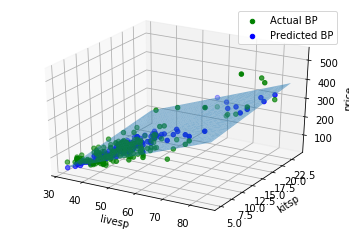

In [63]:
# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='g', label='Actual BP')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='b', label='Predicted BP')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('livesp')
ax.set_ylabel('kitsp')
ax.set_zlabel('price')
ax.legend()
plt.show()